<h1 align="center" style = "font-size:35px;">
<strong>GET STARTED WITH TOPIC MODELLING USING GENSIM IN NLP</strong>
</h1>

<img src="./gensim_logo_positive_complete_tb.png">

<img src="./topic_modelling.png">

In [1]:
#importing library 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
import zipfile


import gensim
from gensim.models import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
from wordcloud import WordCloud 
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/xviii_6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Extracting the Datasets 
with zipfile.ZipFile("./abcnews-date-text.csv.zip") as file_zip:
    file_zip.extractall("./data_for_Topic_modelling")

In [3]:
#loading the data 
data=pd.read_csv("./data_for_Topic_modelling/abcnews-date-text.csv")
data=data[:500000]

In [4]:
#EDA in Datasets 
#Checking the first columns 
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [5]:
#checking the shape 
#as you see there are millions of the headline news. 
data.shape

(500000, 2)

In [6]:
#checking the info about the data to gain more inference , 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   publish_date   500000 non-null  int64 
 1   headline_text  500000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [7]:
#Feature Engineering 
#Deleting the publish data column since we want only headline_text columns. 
del data['publish_date']

In [8]:
#confirm for deletion 
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


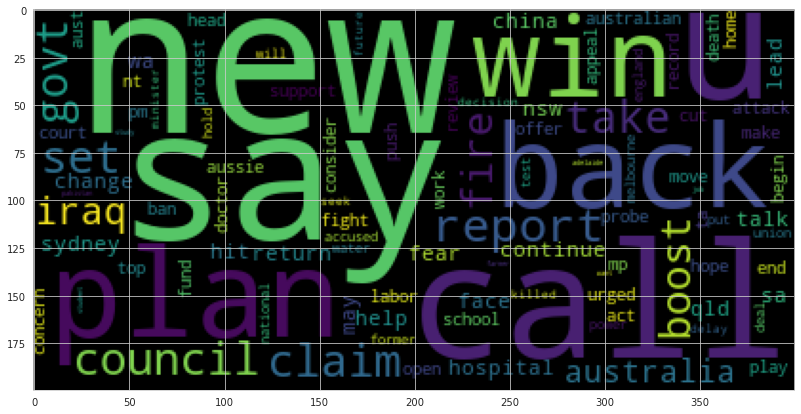

In [11]:
#word cloud visualization for the headline_text 
sns.set_style(style="whitegrid")
wc = WordCloud(
    background_color='black',
    max_words = 100, 
    random_state = 42,
    max_font_size=110
    )
wc.generate(' '.join(data['headline_text']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [12]:
#function to perform the pre processing steps on the  dataset
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            #Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result

In [13]:
processed_docs = data['headline_text'].map(preprocess)
processed_docs[:10]

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

In [14]:
#Create a dictionary from 'processed_docs' containing the number of times a word appears 
dictionary = gensim.corpora.Dictionary(processed_docs)

In [16]:
dictionary #it return the object , hence dictionary is created 

In [18]:
#confirm if the Dictionary is created 
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam


In [19]:
#Create the Bag-of-words(BoW) model for sample test document
document_num = 4310 #this is just a sample document that i have trained to check which topics beolongs to this documents, you want give any number 
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [20]:
#Checking Bag of Words corpus for our sample document
bow_corpus[document_num]

[(168, 1), (246, 1), (299, 1), (602, 1), (867, 1), (3878, 1), (3879, 1)]

In [21]:
# Here document_num is document number 4310 which we have checked  
bow_doc_4310 = bow_corpus[document_num]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],dictionary[bow_doc_4310[i][0]],bow_doc_4310[i][1]))

Word 168 ("govt") appears 1 time.
Word 246 ("group") appears 1 time.
Word 299 ("vote") appears 1 time.
Word 602 ("local") appears 1 time.
Word 867 ("want") appears 1 time.
Word 3878 ("compulsori") appears 1 time.
Word 3879 ("ratepay") appears 1 time.


In [22]:
#Modelling LDA from Gensim by passing bow_corpus(bags of words)
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [23]:
#explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.055*"polic" + 0.031*"charg" + 0.030*"interview" + 0.024*"court" + 0.023*"kill" + 0.021*"crash" + 0.019*"death" + 0.017*"attack" + 0.017*"murder" + 0.016*"jail"


Topic: 1 
Words: 0.028*"report" + 0.019*"worker" + 0.018*"protest" + 0.018*"rudd" + 0.017*"bushfir" + 0.015*"talk" + 0.013*"push" + 0.013*"head" + 0.011*"futur" + 0.010*"decis"


Topic: 2 
Words: 0.024*"australia" + 0.016*"forc" + 0.014*"student" + 0.012*"aussi" + 0.012*"look" + 0.012*"adelaid" + 0.011*"world" + 0.011*"tiger" + 0.011*"sign" + 0.010*"obama"


Topic: 3 
Words: 0.021*"open" + 0.016*"win" + 0.016*"test" + 0.014*"swine" + 0.012*"final" + 0.011*"lead" + 0.010*"question" + 0.010*"race" + 0.009*"tour" + 0.008*"take"


Topic: 4 
Words: 0.021*"boost" + 0.015*"market" + 0.015*"australian" + 0.014*"green" + 0.014*"fund" + 0.011*"servic" + 0.011*"scheme" + 0.011*"year" + 0.010*"health" + 0.010*"govt"


Topic: 5 
Words: 0.027*"hospit" + 0.026*"rise" + 0.016*"nation" + 0.015*"flood" + 0.015*"blaze" + 0.015

In [26]:
#Check which topics our test document that we named above belongs to using the LDA Bag of Words model.
# Our test document is document number 4310 , let's assume for 10 topics
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7069008946418762	 
Topic: 0.034*"council" + 0.031*"govt" + 0.030*"urg" + 0.025*"plan" + 0.018*"warn" + 0.014*"seek" + 0.013*"say" + 0.011*"consid" + 0.011*"public" + 0.010*"help"

Score: 0.1930520087480545	 
Topic: 0.020*"coast" + 0.018*"power" + 0.015*"union" + 0.015*"job" + 0.014*"gold" + 0.013*"break" + 0.012*"minist" + 0.011*"cut" + 0.011*"want" + 0.010*"safeti"

Score: 0.012508189305663109	 
Topic: 0.028*"report" + 0.019*"worker" + 0.018*"protest" + 0.018*"rudd" + 0.017*"bushfir" + 0.015*"talk" + 0.013*"push" + 0.013*"head" + 0.011*"futur" + 0.010*"decis"

Score: 0.012506944127380848	 
Topic: 0.021*"boost" + 0.015*"market" + 0.015*"australian" + 0.014*"green" + 0.014*"fund" + 0.011*"servic" + 0.011*"scheme" + 0.011*"year" + 0.010*"health" + 0.010*"govt"

Score: 0.012505875900387764	 
Topic: 0.027*"hospit" + 0.026*"rise" + 0.016*"nation" + 0.015*"flood" + 0.015*"blaze" + 0.015*"storm" + 0.013*"elect" + 0.013*"fall" + 0.012*"premier" + 0.012*"hit"

Score: 0.012505521066486

In [27]:
#Now we have create a Model for Topic modelling in specified document , now you can give the 
# model created any other unseen documents , then it will easily detect what topics 
# might belongs to that documents 